#### Saksham Bhujel (ACE080BCT063)
#### Samar Patali   (ACE080BCT065)
#### Samir Paudel   (ACE080BCT066)

# Health_heart_experiment

In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

df = load_dataset("./Health_heart_experimental.csv")
df.head(10)



,Unnamed: 0,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,0,64,1,141,96,128,69,147,32.0,1
1,1,21,1,109,100,106,48,150,21.0,0
2,2,30,0,112,73,126,69,183,21.0,0
3,3,35,1,106,90,130,45,149,20.0,0
4,4,39,0,140,90,112,92,166,33.0,1
5,5,68,1,115,93,130,53,172,18.0,0
6,6,50,1,125,117,89,56,172,19.0,0
7,7,23,1,111,85,131,55,169,19.0,0
8,8,34,1,144,80,90,67,178,21.0,0
9,9,36,0,113,109,187,46,114,35.0,1


In [ ]:
stats = df.describe()

print(stats)

              Index           age           sex         SysBP         DiaBP  \
count  71760.000000  71760.000000  71760.000000  71760.000000  71760.000000   
mean   35879.500000     44.453526      0.499080    125.477048     95.901212   
std    20715.471996     14.514111      0.500003     12.108559     13.575824   
min        0.000000     20.000000      0.000000    105.000000     73.000000   
25%    17939.750000     32.000000      0.000000    115.000000     84.000000   
50%    35879.500000     44.000000      0.000000    125.000000     96.000000   
75%    53819.250000     57.000000      1.000000    136.000000    108.000000   
max    71759.000000     69.000000      1.000000    146.000000    119.000000   

                 HR      weightKg      heightCm           BMI    indication  
count  71760.000000  71760.000000  71760.000000  71760.000000  71760.000000  
mean     138.539298     72.161455    158.724220     28.888043      0.473188  
std       35.239098     19.549060     18.088522      6

In [6]:
missing_values = df.isnull().sum()
# Display missing values
print(missing_values)

Unnamed: 0    0
age           0
sex           0
SysBP         0
DiaBP         0
HR            0
weightKg      0
heightCm      0
BMI           0
indication    0
dtype: int64


In [7]:
# Identify data types
data_types = df.dtypes

# Display data types
print(data_types)

Unnamed: 0      int64
age             int64
sex             int64
SysBP           int64
DiaBP           int64
HR              int64
weightKg        int64
heightCm        int64
BMI           float64
indication      int64
dtype: object


### Line Plot: Age vs. HR

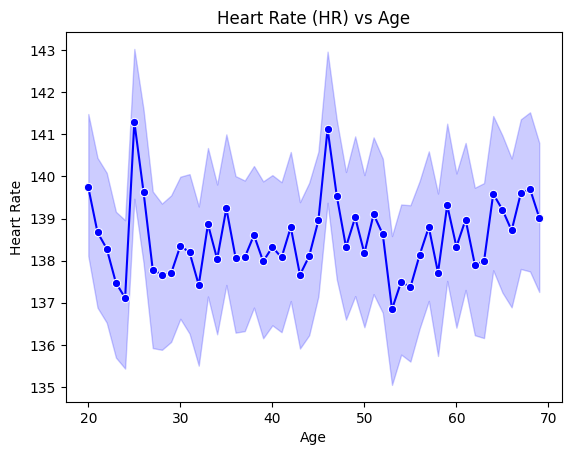

In [8]:
sns.lineplot(data=df, x='age', y='HR', color="blue", marker='o')
plt.title("Heart Rate (HR) vs Age")
plt.ylabel("Heart Rate")
plt.xlabel("Age")
plt.show()


### Bar Plot: Sex vs Average BMI

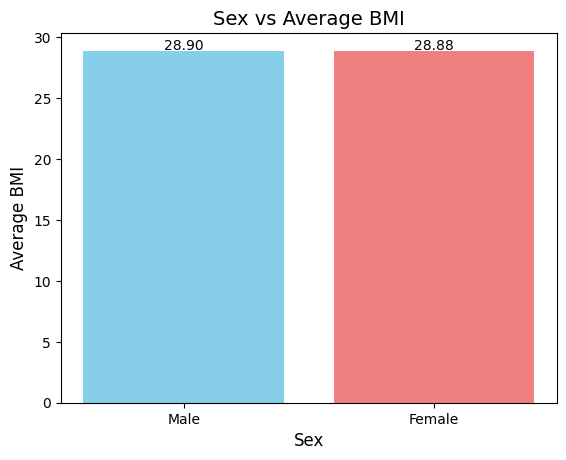

In [ ]:
# Calculate average BMI for each sex
avg_bmi = df.groupby('sex')['BMI'].mean()

# Create a bar plot with custom styling
bars = plt.bar(avg_bmi.index, avg_bmi, color=['skyblue', 'lightcoral'])

# Add a title and labels
plt.title("Sex vs Average BMI", fontsize=14)
plt.ylabel("Average BMI", fontsize=12)
plt.xlabel("Sex", fontsize=12)

# Label the x-axis with 'Male' and 'Female'
plt.xticks([0, 1], ['Male', 'Female'], fontsize=10)

# Add the peak value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Position the text slightly above the bar
             f'{height:.2f}', ha='center', fontsize=10)

# Improve tick size for better readability
plt.yticks(fontsize=10)

# Display the plot
plt.show()


### Pie Chart: Blood Pressure Categories (Normal, Elevated, High BP) 

Blood Pressure Category Distribution:
BP_Category
High BP (Stage 2)    36500
High BP (Stage 1)    28797
Normal                3885
Elevated              2578
Name: count, dtype: int64


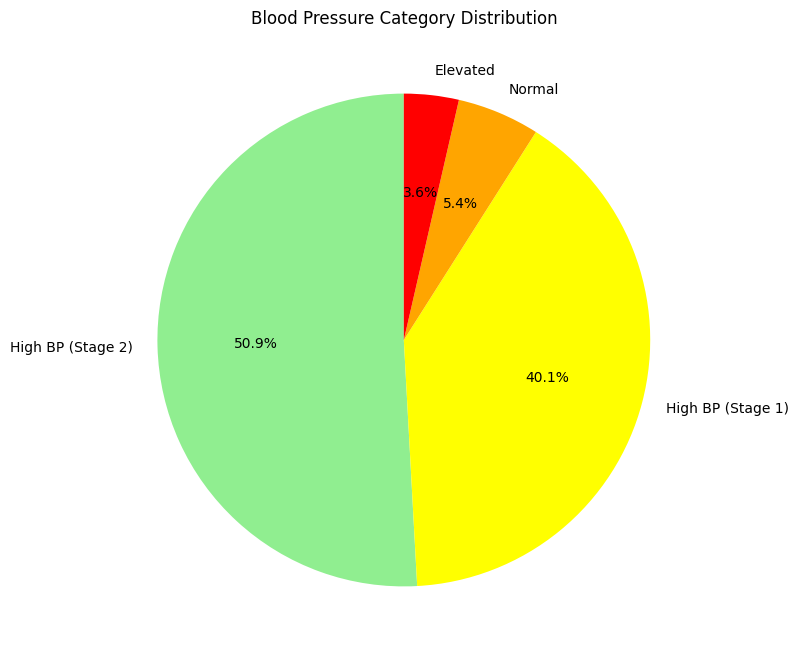

In [ ]:

# Define a function to categorize blood pressure
def categorize_bp(row):
    sys_bp = row['SysBP']
    dia_bp = row['DiaBP']
    
    if sys_bp < 120 and dia_bp < 80:
        return 'Normal'
    elif 120 <= sys_bp <= 129 and dia_bp < 80:
        return 'Elevated'
    elif 130 <= sys_bp <= 139 or 80 <= dia_bp <= 89:
        return 'High BP (Stage 1)'
    elif sys_bp >= 140 or dia_bp >= 90:
        return 'High BP (Stage 2)'
    else:
        return 'Uncategorized'

# Apply the function to create a new column for BP categories
df['BP_Category'] = df.apply(categorize_bp, axis=1)

# Analyze the distribution of BP categories
bp_distribution = df['BP_Category'].value_counts()

# Display the distribution
print("Blood Pressure Category Distribution:")
print(bp_distribution)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bp_distribution, labels=bp_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'yellow', 'orange', 'red'])
plt.title('Blood Pressure Category Distribution')
plt.show()

### Box Plot: BMI by sex 

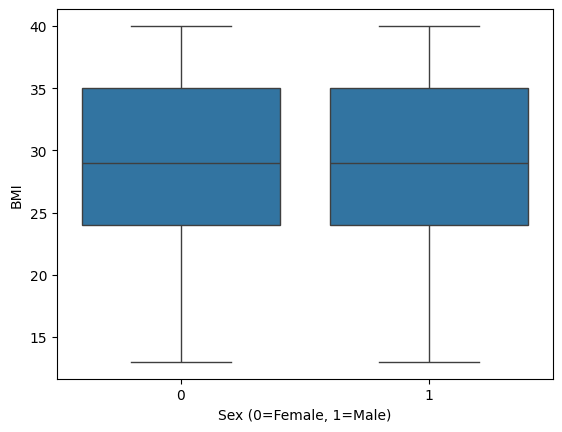

In [ ]:
df = load_dataset("./Health_heart_experimental.csv")
sns.boxplot(x='sex', y='BMI', data=df)
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("BMI")
plt.show()

### Histogram: SysBP Distribution

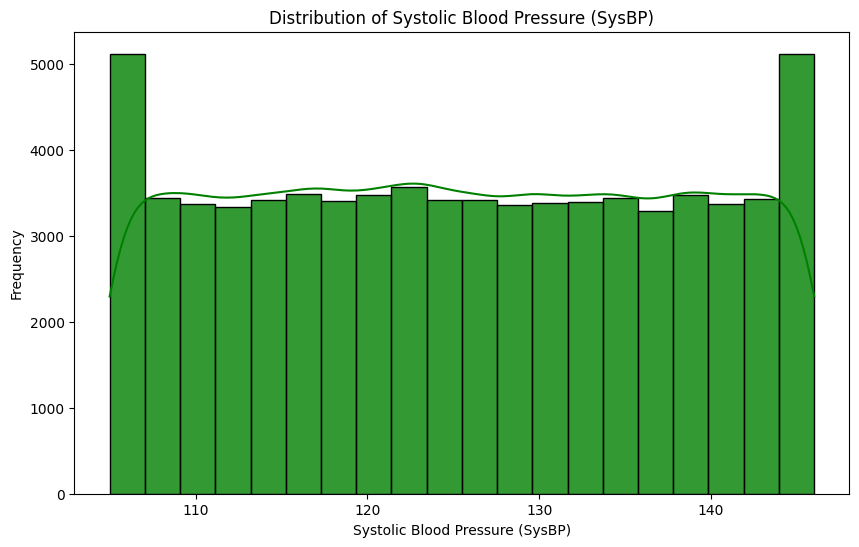

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = load_dataset("./Health_heart_experimental.csv")

# Plot the distribution of SysBP
plt.figure(figsize=(10, 6))
sns.histplot(df['SysBP'], bins=20, kde=True, color='green', alpha=0.8)
plt.title("Distribution of Systolic Blood Pressure (SysBP)")
plt.xlabel("Systolic Blood Pressure (SysBP)")
plt.ylabel("Frequency")
plt.show()

### Scatter Plot: HeightCm vs. WeightKg 

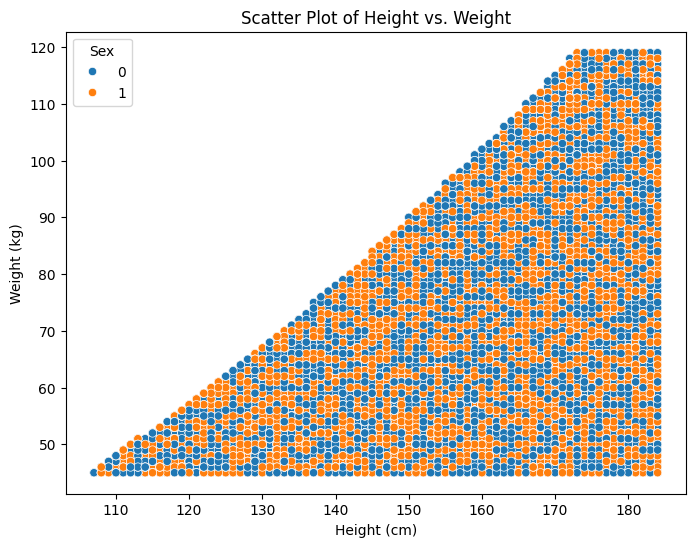

In [ ]:
# Scatter plot for HeightCm vs. WeightKg
df = load_dataset("./Health_heart_experimental.csv")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['heightCm'], y=df['weightKg'], hue=df['sex'])

# Adding labels and title
plt.title("Scatter Plot of Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend(title="Sex")
plt.show()

### Pair Plot: Age, SysBP, DiaBP, BMI writ code

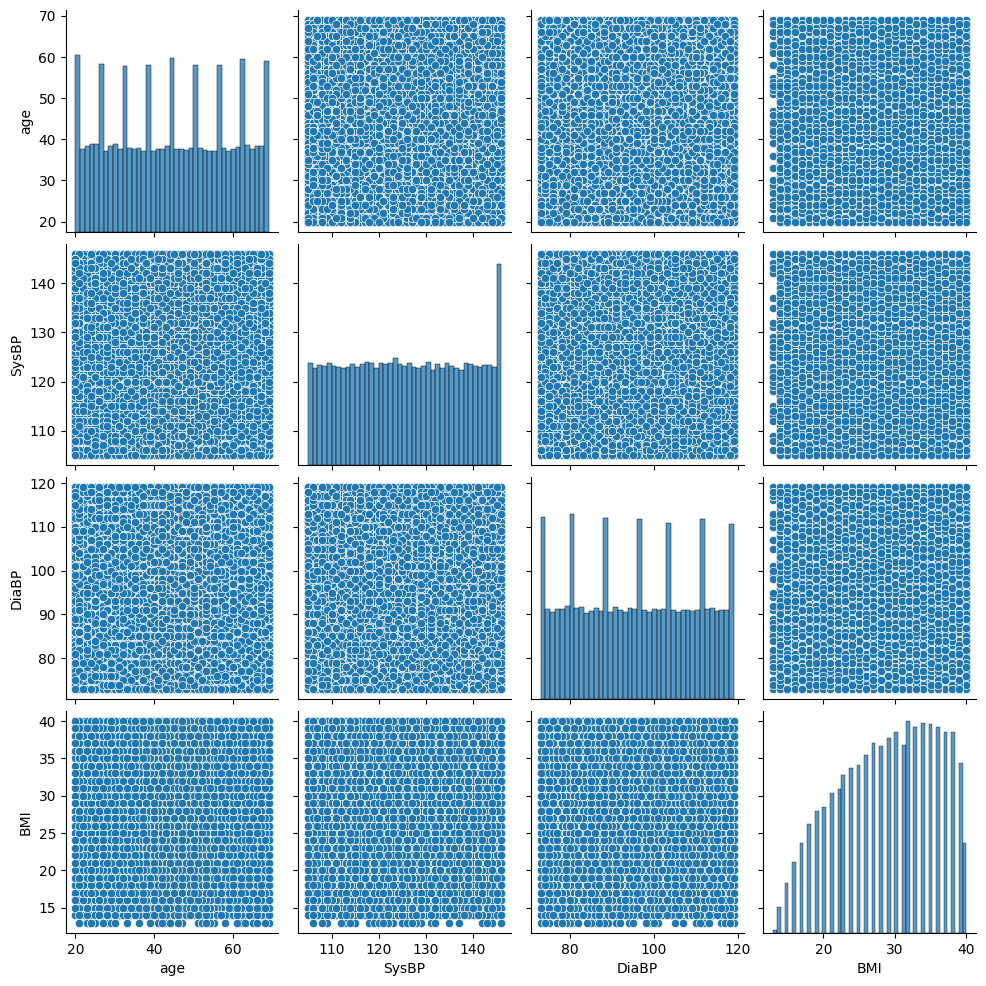

In [ ]:
selected_features = ['age', 'SysBP', 'DiaBP', 'BMI']

# Creating the pair plot
sns.pairplot(df[selected_features])

# Show the plot
plt.show()

### Heat Map: 

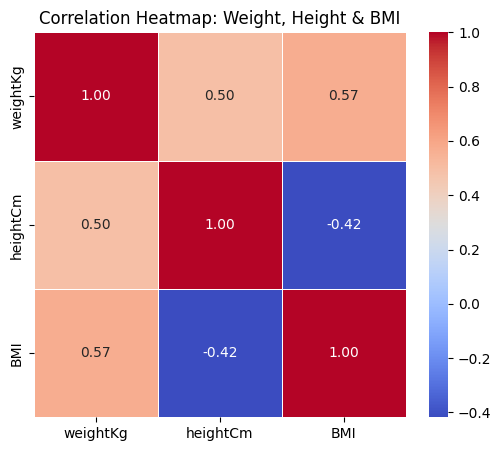

In [ ]:
selected_features = ['weightKg', 'heightCm', 'BMI']

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding title
plt.title("Correlation Heatmap: Weight, Height & BMI")
plt.show()

## Outlier Detection & Handling

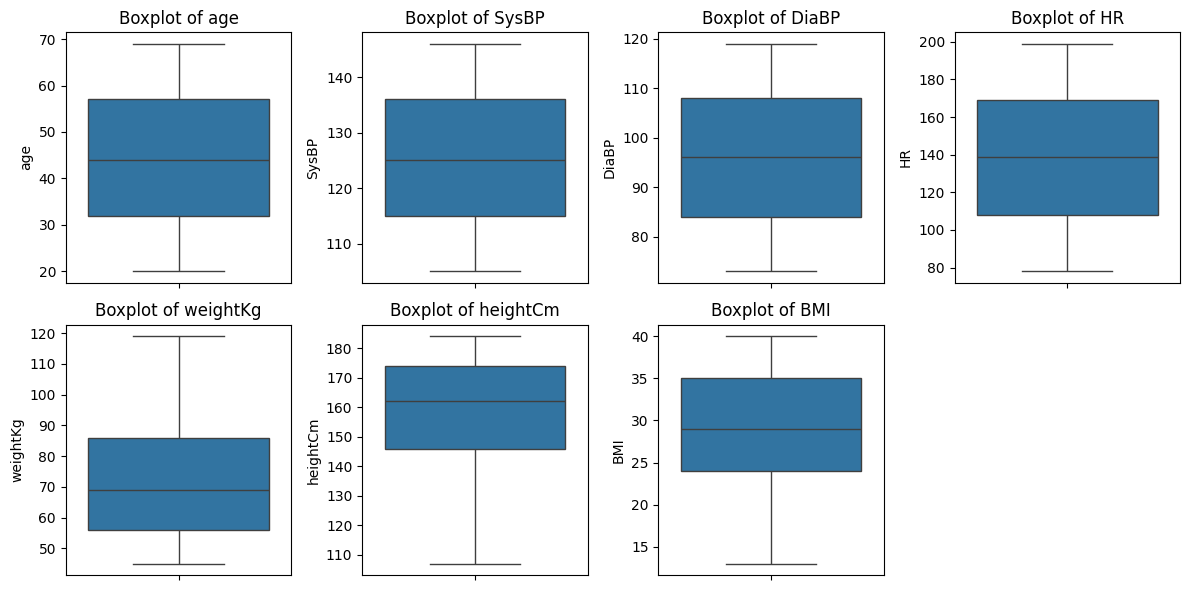

In [ ]:
features = ['age', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI']

# Create boxplots for each numerical feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)  # Arrange subplots
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Define a threshold (commonly 3 for extreme outliers)
z_threshold = 3

# Compute the Z-scores
z_scores = df[features].apply(stats.zscore)

# Keep only data points within the threshold
df_zscore_filtered = df[(z_scores < z_threshold).all(axis=1)]

print("Original dataset size:", df.shape)
print("After Z-score filtering:", df_zscore_filtered.shape)


Original dataset size: (71760, 10)
After Z-score filtering: (71760, 10)


In [ ]:
df = load_dataset("./Health_heart_experimental.csv")
#  Define IQR function
def remove_outliers_iqr(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    # Define acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
    return df_filtered

# Apply IQR method
df_iqr_filtered = remove_outliers_iqr(df, features)

print("Original dataset size:", df.shape)
print("After IQR filtering:", df_iqr_filtered.shape)


Original dataset size: (71760, 10)
After IQR filtering: (71760, 10)


### Feature Engineering 


#### Hanlding Missing values

In [ ]:
df = load_dataset("./Health_heart_experimental.csv")
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values (imputation)
df.fillna(df.median(), inplace=True)  # Fill with median for numerical columns

# Option 2: Drop missing values (if very few)
df.dropna(inplace=True)


Index         0
age           0
sex           0
SysBP         0
DiaBP         0
HR            0
weightKg      0
heightCm      0
BMI           0
indication    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_features = ['age', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


#### Feature Construction: BMI Category

In [ ]:
# Function to categorize BMI into groups
df = load_dataset("./Health_heart_experimental.csv")
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create the 'BMI_Category' column
df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Display the updated dataframe with the new 'BMI_Category' feature
df[['age', 'BMI', 'BMI_Category']].head()


,age,BMI,BMI_Category
0,64,32.0,Obesity
1,21,21.0,Normal weight
2,30,21.0,Normal weight
3,35,20.0,Normal weight
4,39,33.0,Obesity


#### Feature Construction: HeartRate Zone

In [ ]:
# Function to categorize heart rate into zones
def heart_rate_zone(hr):
    if hr < 60:
        return 'Resting'
    elif 60 <= hr < 100:
        return 'Normal'
    elif 100 <= hr < 130:
        return 'Moderate'
    else:
        return 'Vigorous'

# Apply the function to create the 'HR_Zone' column
df['HR_Zone'] = df['HR'].apply(heart_rate_zone)

# Display the updated dataframe with the new 'HR_Zone' feature
df[['age', 'HR', 'HR_Zone']].head()


,age,HR,HR_Zone
0,64,128,Moderate
1,21,106,Moderate
2,30,126,Moderate
3,35,130,Vigorous
4,39,112,Moderate


#### Feature Selection

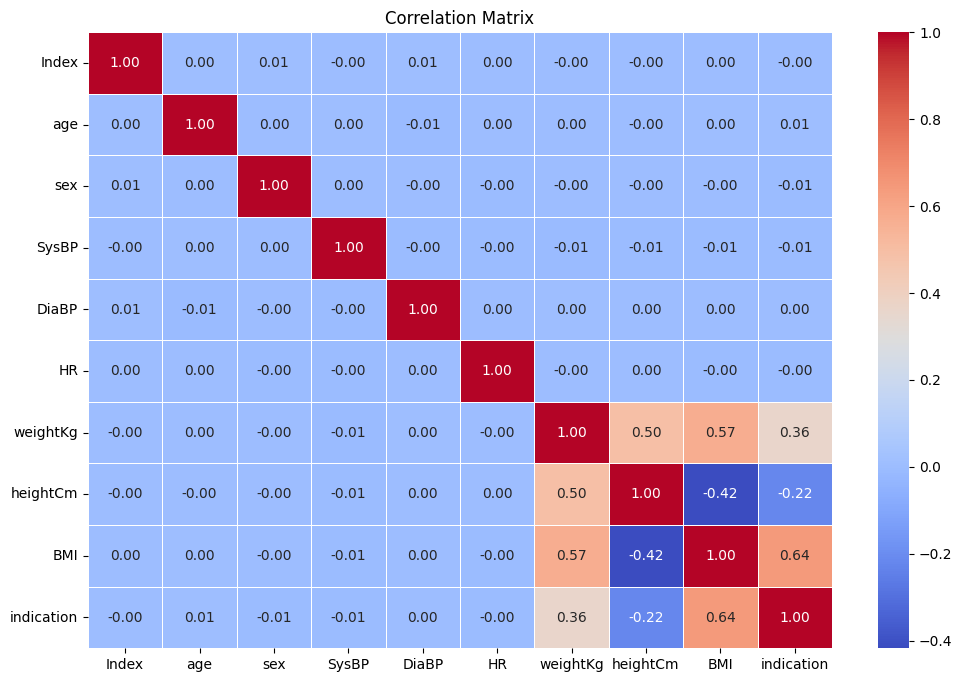

,Index,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,0,64,1,141,96,128,69,147,32.0,1
1,1,21,1,109,100,106,48,150,21.0,0
2,2,30,0,112,73,126,69,183,21.0,0
3,3,35,1,106,90,130,45,149,20.0,0
4,4,39,0,140,90,112,92,166,33.0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated features (correlation > 0.9)
# We'll create a mask to remove redundant features
threshold = 0.9
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

# Remove highly correlated features
df_reduced_corr = df.drop(columns=high_corr_vars)

# Display the reduced dataframe with less correlated features
df_reduced_corr.head()


### Statistical Analysis

#### 1. Hypothesis Testing

a. T-Test

In [ ]:
from scipy import stats

# Separate data by sex
male_bmi = df[df['sex'] == '1']['BMI']
female_bmi = df[df['sex'] == '0']['BMI']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi)

# Print the t-test result
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in BMI between Male and Female (reject H0).")
else:
    print("There is no significant difference in BMI between Male and Female (fail to reject H0).")


T-statistic: nan
P-value: nan
There is no significant difference in BMI between Male and Female (fail to reject H0).


### Regression


a. Linear Regression


i.  Simple Linear Regression:  Predicting BMI using Age

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features (Age) and target (BMI)
X = df[['age']]
y = df['BMI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred = linear_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 46.039572408654564
R-squared: -0.00019481573536261898


ii. Multiple Regression: Predicting BMI using Age, Weight, and Height

In [ ]:
# Select features (Age, Weight, Height) and target (BMI)
X = df[['age', 'weightKg', 'heightCm']]
y = df['BMI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

# Predictions
y_pred = multiple_linear_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.1758802508269415
R-squared: 0.9744543819746332


b. Logistic Regression: Example: Predicting Health Condition (Binary Classification)
Let's assume we want to predict if a person has a health condition based on their BMI and Age. For simplicity, we'll binarize the Indication column (e.g., 'Yes' or 'No').

In [ ]:
# Ensure the 'Indication_binary' column is created correctly
df['Indication_binary'] = df['indication'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check the distribution of the target variable to make sure both classes are present
print(df['Indication_binary'].value_counts())

# Handle missing values if necessary
df.dropna(subset=['Indication_binary'], inplace=True)

# Check if both classes (0 and 1) are present after dropping any missing values
if df['Indication_binary'].nunique() < 2:
    print("Target variable contains only one class. Cannot proceed with Logistic Regression.")
else:
    # Define features and target variable
    X = df[['age', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI']]  # Example feature selection
    y = df['Indication_binary']

    # Split data into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Logistic Regression model
    from sklearn.linear_model import LogisticRegression
    log_regressor = LogisticRegression()
    log_regressor.fit(X_train, y_train)

    # Predictions
    y_pred = log_regressor.predict(X_test)

    # Evaluate the model
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Indication_binary
0    71760
Name: count, dtype: int64
Target variable contains only one class. Cannot proceed with Logistic Regression.


### LINEAR REGRESSION


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

health = load_dataset("./Health_heart_experimental.csv")
df.head(10)

,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,64,1,141,96,128,69,147,32.0,1
1,21,1,109,100,106,48,150,21.0,0
2,30,0,112,73,126,69,183,21.0,0
3,35,1,106,90,130,45,149,20.0,0
4,39,0,140,90,112,92,166,33.0,1
5,68,1,115,93,130,53,172,18.0,0
6,50,1,125,117,89,56,172,19.0,0
7,23,1,111,85,131,55,169,19.0,0
8,34,1,144,80,90,67,178,21.0,0
9,36,0,113,109,187,46,114,35.0,1


In [6]:
## Prepare data
# Define features (X) and target (y)
X = df.drop(columns=["indication"])  # Independent variables
y = df["indication"]  # Dependent variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
## Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
## Make predictions
y_pred = model.predict(X_test)

In [9]:
## Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Output results
print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 0.1291
R-squared Score (R²): 0.4820


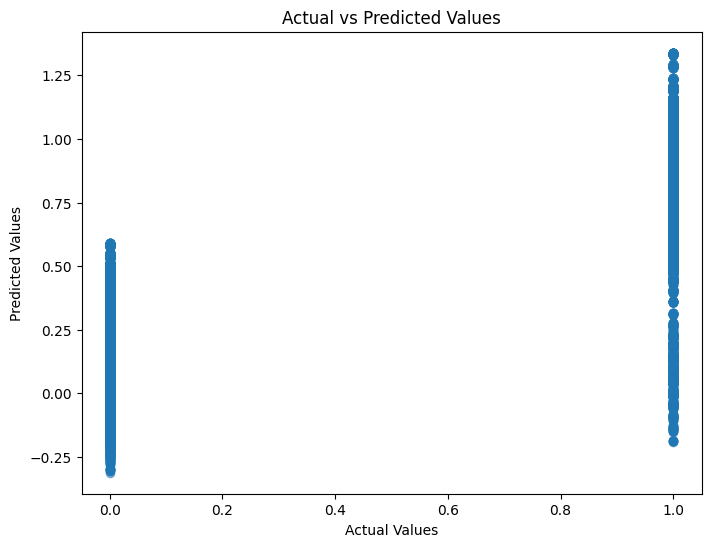

In [10]:
## Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### LOGISTICS REGRESSION

Time taken: 0.6089634895324707
Optimized Coefficients (Theta): [ 4.73694014e-01  1.76905742e-03 -2.74261925e-04 -2.46079094e-04
 -1.66389840e-03  3.21622639e-01]
MSE (Train): 0.14583963930724828
MSE (Test): 0.15014407664669185


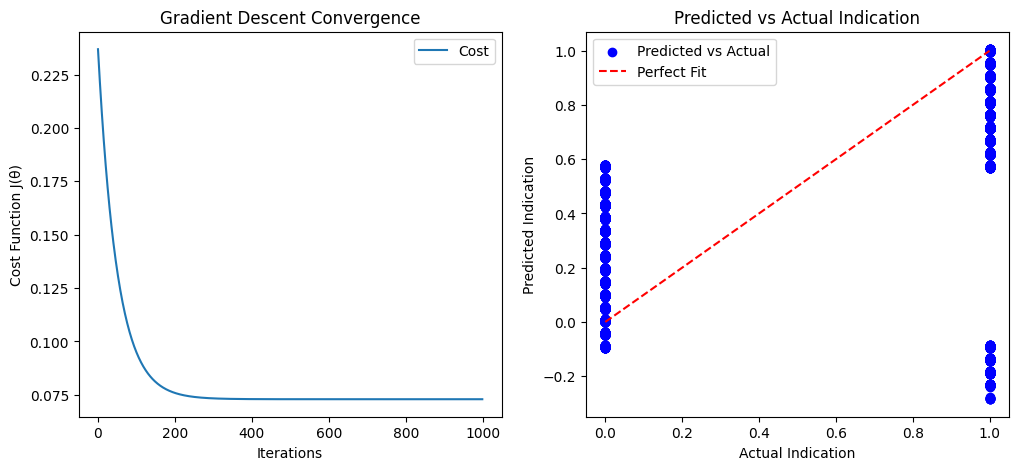

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time

# Load dataset
data = pd.read_csv("./Health_heart_experimental.csv")

# Select relevant features
features = ['age', 'SysBP', 'DiaBP', 'HR', 'BMI']  # Adjust as needed
X = data[features].values  # Features
y = data['indication'].values  # Target variable (assuming binary classification)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept (bias) term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Gradient Descent
m = X_train.shape[0]
cost_history = []

start = time()
for _ in range(iterations):
    y_hat = X_train @ theta  # Predictions
    error = y_hat - y_train
    theta -= (alpha / m) * (X_train.T @ error)  # Update theta

    cost = (1 / (2 * m)) * np.sum(error ** 2)  # Compute cost
    cost_history.append(cost)
time_taken = time() - start

print("Time taken:", time_taken)
print("Optimized Coefficients (Theta):", theta)

# Compute MSE
def mse(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

y_train_pred = X_train @ theta
y_test_pred = X_test @ theta

mse_train = mse(y_train_pred, y_train)
mse_test = mse(y_test_pred, y_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

# Visualization
plt.figure(figsize=(12, 5))

# Cost function convergence
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost Function J(θ)")
plt.title("Gradient Descent Convergence")
plt.legend()

# Scatter plot: Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Indication")
plt.ylabel("Predicted Indication")
plt.title("Predicted vs Actual Indication")
plt.legend()

plt.show()


### LOGISTIC REGRESSION

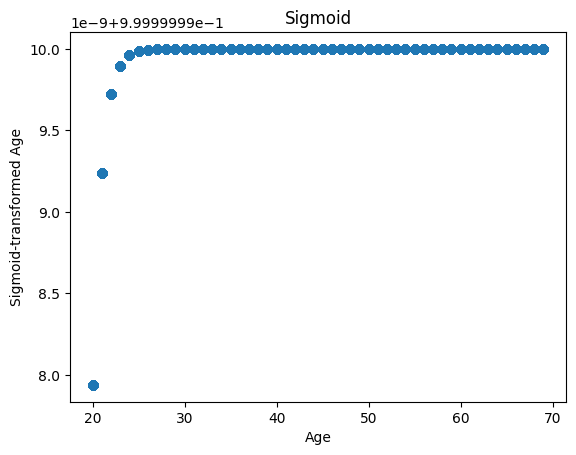

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("./Health_heart_experimental.csv")

# Ensure 'age' column is numeric and clean the data
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # Ensure 'age' is numeric

# Remove any rows with missing 'age' data
data_clean = data.dropna(subset=['age'])

# Function for the sigmoid calculation
sigmoid_gen = lambda x: (1 + np.exp(-x))**-1

# Generate data points
x = data_clean['age']  # Use 'age' column from the dataset
y = sigmoid_gen(x)  # Apply sigmoid transformation to 'age'

# Plot the sigmoid
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('Age')
plt.ylabel('Sigmoid-transformed Age')
plt.show()

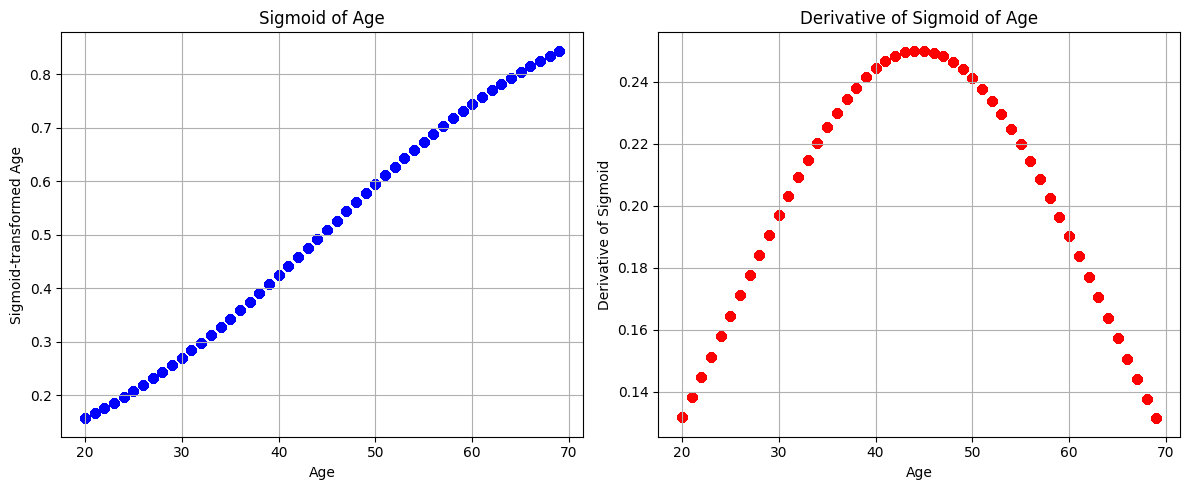

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("./Health_heart_experimental.csv")

# Ensure 'age' column is numeric and clean the data
data['age'] = pd.to_numeric(data['age'], errors='coerce')  
data_clean = data.dropna(subset=['age'])

# Normalize 'age' to avoid sigmoid saturation
age_mean = data_clean['age'].mean()
age_std = data_clean['age'].std()
x = (data_clean['age'] - age_mean) / age_std  # Standardization

# Sigmoid function and its derivative
def sigmoid(x, deriv=False):
    sig = 1 / (1 + np.exp(-x))
    return sig * (1 - sig) if deriv else sig

# Compute sigmoid and its derivative
y = sigmoid(x)
y_deriv = sigmoid(x, deriv=True)

# Plot the sigmoid and its derivative
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Sigmoid plot
ax[0].scatter(data_clean['age'], y, color='b', alpha=0.7)
ax[0].set_title('Sigmoid of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Sigmoid-transformed Age')
ax[0].grid(True)

# Derivative of sigmoid plot
ax[1].scatter(data_clean['age'], y_deriv, color='r', alpha=0.7)
ax[1].set_title('Derivative of Sigmoid of Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Derivative of Sigmoid')
ax[1].grid(True)

plt.tight_layout()
plt.show()


age    0
BMI    0
dtype: int64
Feature matrix shape: (71760, 1), Target vector shape: (71760,)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19664\1854872279.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19664\1854872279.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

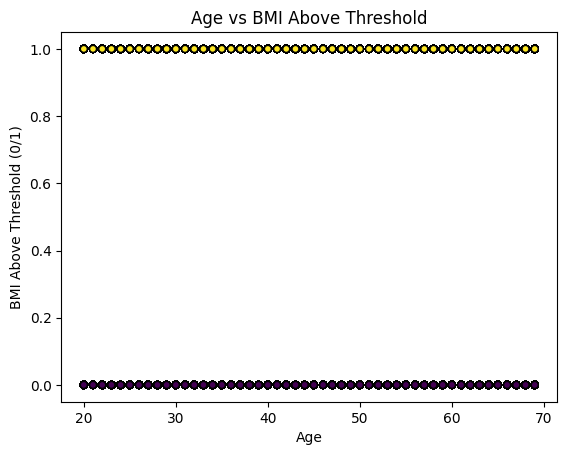

Accuracy: 0.6795


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("./Health_heart_experimental.csv")

# Check for missing values in key columns
print(data[['age', 'BMI']].isnull().sum())

# Fill missing values with the median for 'age' and 'BMI'
data['age'].fillna(data['age'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

# Ensure 'age' and 'BMI' are numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')

# Create a binary classification target based on BMI threshold
threshold = 25
data['BMI_above_threshold'] = (data['BMI'] > threshold).astype(int)

# Feature matrix (X) and target vector (y)
X = data[['age']]  # Using 'age' as the feature
y = data['BMI_above_threshold']  # The target is whether BMI > threshold

# Check if X and y are not empty
print(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")

# Plot the data for visualization
plt.scatter(X, y, marker='o', c=y, s=25, edgecolor='k')
plt.title("Age vs BMI Above Threshold")
plt.xlabel("Age")
plt.ylabel("BMI Above Threshold (0/1)")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept column (bias term)
intercept_train = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept_train, X_train), axis=1)

intercept_test = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept_test, X_test), axis=1)

# Logistic Regression model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)

print(f"Accuracy: {accuracy:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def h_theta(X, w):
    return sigmoid(X @ w)

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    loss = -np.sum(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9)) / m  # Avoid log(0) issue
    grad = np.dot(X.T, error) / m
    return loss, grad

def mini_batch_GD(X, y, max_iter=5000, batch_size=32, learning_rate=0.01):
    w = np.zeros(X.shape[1])  # Initialize weights
    l_rate = 0.01  # Learning rate
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        # Select a random batch
        idx = np.random.randint(0, X.shape[0] - batch_size + 1)
        batch_X, batch_y = X[idx:idx+batch_size], y[idx:idx+batch_size]
        
        # Compute gradient
        loss, grad = gradient(batch_X, batch_y, w)
        
        # Update weights
        w = w- l_rate * grad
        
        if i % 500 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")
    
    return w,i

# Train the model using Mini-Batch GD
w,i = mini_batch_GD(X_train, y_train, max_iter=5000)

# Predict probabilities and convert to binary output
y_pred_prob = h_theta(X_test, w)
y_pred = np.round(y_pred_prob)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)

print(f"\nFinal Accuracy: {accuracy:.2f}")



Iteration 0, Loss: 0.6931
Iteration 500, Loss: 0.4834
Iteration 1000, Loss: 0.4609
Iteration 1500, Loss: 0.4519
Iteration 2000, Loss: 0.4564
Iteration 2500, Loss: 0.4351
Iteration 3000, Loss: 0.4626
Iteration 3500, Loss: 0.4564
Iteration 4000, Loss: 0.4482
Iteration 4500, Loss: 0.4491

Final Accuracy: 0.89
